In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [16]:
import pandas as pd

In [17]:
df = pd.read_csv("SISAGRI.csv")

### Nos quedamos solo con las papas

Valores de la tabla `papa_df`:


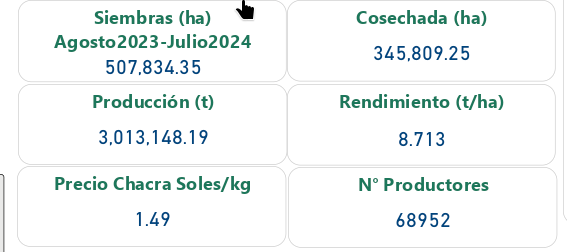


In [18]:
papasdf = df[df["PRODUCTO"].str.startswith("PAPA ")]
papasdf["RENDIMIENTO"] = papasdf["PRODUCCION"].div(papasdf["COSECHA"], fill_value=0)
papasdf = papasdf[papasdf["PRODUCTO"] != "PAPA (agrupa mejoradas y nativas)"]
# Incluyendo a los nulos
papasdf


/tmp/ipykernel_13458/2429353644.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  papasdf["RENDIMIENTO"] = papasdf["PRODUCCION"].div(papasdf["COSECHA"], fill_value=0)


,AÑO,MES,COD_UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,COD_PRODUCTO,PRODUCTO,SIEMBRA,COSECHA,PRODUCCION,PRECIO_CHACRA,RENDIMIENTO
12,2015,12,10106,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,14040090108,PAPA CHAUCHA (papas nativas),0.0,1.0,15.0,1.85,15.0
50,2015,8,10517,AMAZONAS,LUYA,SAN FRANCISCO DEL YESO,14040090113,PAPA HUAIRO (papas nativas),0.0,7.0,136.5,0.87,19.5
57,2015,2,10501,AMAZONAS,LUYA,LAMUD,14040090107,PAPA CANCHAN (mejoradas)- color,3.0,0.0,0.0,0.00,NaN
58,2015,2,10501,AMAZONAS,LUYA,LAMUD,14040090127,PAPA YUNGAY (mejoradas),0.0,0.0,0.0,0.00,NaN
94,2015,2,10520,AMAZONAS,LUYA,SANTA CATALINA,14040090113,PAPA HUAIRO (papas nativas),10.0,0.0,0.0,0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047866,2020,1,10505,AMAZONAS,LUYA,CONILA,14040090107,PAPA CANCHAN (mejoradas)- color,38.0,1.0,18.0,1.40,18.0
1047867,2021,4,10517,AMAZONAS,LUYA,SAN FRANCISCO DEL YESO,14040090113,PAPA HUAIRO (papas nativas),0.0,2.0,40.0,0.77,20.0
1047910,2020,5,130302,LA LIBERTAD,BOLIVAR,BAMBAMARCA,14040090103,PAPA COLOR (agrupa papas mejoradas de color),0.0,9.0,144.0,1.20,16.0
1047934,2020,2,120120,JUNIN,HUANCAYO,HUASICANCHA,14040090129,PAPA NATIVA (agrupa papas nativas),0.0,0.0,0.0,0.00,NaN


### Lista total de papas

No olvidar que nos quedamos con solo 6

In [19]:
papasdf[papasdf["PRODUCTO"] != "PAPA (agrupa mejoradas y nativas)"].groupby("PRODUCTO").count()

,AÑO,MES,COD_UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,COD_PRODUCTO,SIEMBRA,COSECHA,PRODUCCION,PRECIO_CHACRA,RENDIMIENTO
PRODUCTO,,,,,,,,,,,,
PAPA AMARILIS (mejoradas),474,474,474,474,474,474,474,474,474,474,474,194
PAPA AMARILLA (papas nativas),1471,1471,1471,1471,1471,1471,1471,1467,1467,1467,1466,623
PAPA CANCHAN (mejoradas)- color,966,966,966,966,966,966,966,966,966,966,966,418
PAPA CHAUCHA (papas nativas),573,573,573,573,573,573,573,573,573,573,573,318
PAPA COLOR (agrupa papas mejoradas de color),9215,9215,9215,9215,9215,9215,9215,8942,9020,9020,9020,3897
PAPA HUAIRO (papas nativas),1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,706
PAPA HUAMACHUQUINA O LIMEÑA (Demás papas nativas),53,53,53,53,53,53,53,53,53,53,53,27
PAPA HUAMANTANGA (papas nativas),53,53,53,53,53,53,53,53,53,53,53,17
PAPA MARIVA (Demás papas mejoradas),93,93,93,93,93,93,93,93,93,93,93,40


### Lista de Papas por Departamento

In [ ]:
resultado = (papasdf.groupby(["DEPARTAMENTO", "PROVINCIA", "DISTRITO", "AÑO", "MES"])["PRODUCTO"]
        .nunique()
        .sort_values(ascending=False))

resultado[resultado == 3]